In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from tensorflow import keras
from tensorflow.keras import layers, callbacks

In [2]:
data = pd.read_csv("data.csv")
data

,year,country,gdp,foreign_direct_investment,gross_savings,unemployment,labor_force,mortality_rate,new_businesses_registered,education_expenditure,...,manufacturing,tobacco_use,profit_tax,population,literacy_rate,birth_rate,death_rate,migration,agriculture_forestry_fishing,industry
0,1996,Afghanistan,NaN,NaN,NaN,NaN,4695426.0,145.6,NaN,NaN,...,NaN,NaN,NaN,18853437.0,NaN,48.870,12.964,NaN,NaN,NaN
1,1997,Afghanistan,NaN,NaN,NaN,NaN,4788255.0,141.2,NaN,NaN,...,NaN,NaN,NaN,19357126.0,NaN,48.833,12.655,-867540.0,NaN,NaN
2,1998,Afghanistan,NaN,NaN,NaN,NaN,4853675.0,136.9,NaN,NaN,...,NaN,NaN,NaN,19737765.0,NaN,48.688,12.348,NaN,NaN,NaN
3,1999,Afghanistan,NaN,NaN,NaN,NaN,4939405.0,132.8,NaN,NaN,...,NaN,NaN,NaN,20170844.0,NaN,48.419,12.037,NaN,NaN,NaN
4,2000,Afghanistan,NaN,NaN,NaN,NaN,5071018.0,128.7,NaN,NaN,...,NaN,NaN,NaN,20779953.0,NaN,48.021,11.718,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5275,2011,Zimbabwe,1.410192e+10,-344300000.0,-3.479166e+08,5.37,6194591.0,81.4,8541.0,231140838.9,...,1.293485e+09,NaN,20.0,12894316.0,83.58271,36.526,12.384,NaN,1.222053e+09,3.062978e+09
5276,2012,Zimbabwe,1.711485e+10,-349850000.0,-2.406172e+09,NaN,6285545.0,73.8,9491.0,284614325.8,...,2.403507e+09,15.2,19.8,13115131.0,NaN,36.292,11.167,-622997.0,1.376807e+09,4.335296e+09
5277,2013,Zimbabwe,1.909102e+10,-373050000.0,-9.432642e+08,NaN,6385796.0,67.8,9782.0,328776408.0,...,2.466380e+09,NaN,19.6,13350356.0,NaN,35.768,10.115,NaN,1.363954e+09,4.543589e+09
5278,2014,Zimbabwe,1.949552e+10,-472800000.0,-5.911380e+08,4.77,6486791.0,64.4,9465.0,336986734.0,...,2.454635e+09,14.7,17.7,13586681.0,88.69342,34.978,9.277,NaN,1.704942e+09,4.624054e+09


In [3]:
data.isnull().sum()

year                               0
country                            0
gdp                              316
foreign_direct_investment       1924
gross_savings                   2335
unemployment                    2372
labor_force                      620
mortality_rate                   500
new_businesses_registered       4056
education_expenditure           1635
age_dependency_ratio             484
food_production_index            398
human_capital_index             5177
imports                          768
exports                          772
life_expectancy_birth            361
manufacturing                    954
tobacco_use                     4516
profit_tax                      2851
population                        26
literacy_rate                   3895
birth_rate                       268
death_rate                       279
migration                       4320
agriculture_forestry_fishing     681
industry                         717
dtype: int64

In [4]:
data['gdp_per_capita'] = data.gdp / data.population
data.head()

,year,country,gdp,foreign_direct_investment,gross_savings,unemployment,labor_force,mortality_rate,new_businesses_registered,education_expenditure,...,tobacco_use,profit_tax,population,literacy_rate,birth_rate,death_rate,migration,agriculture_forestry_fishing,industry,gdp_per_capita
0,1996,Afghanistan,NaN,NaN,NaN,NaN,4695426.0,145.6,NaN,NaN,...,NaN,NaN,18853437.0,NaN,48.870,12.964,NaN,NaN,NaN,NaN
1,1997,Afghanistan,NaN,NaN,NaN,NaN,4788255.0,141.2,NaN,NaN,...,NaN,NaN,19357126.0,NaN,48.833,12.655,-867540.0,NaN,NaN,NaN
2,1998,Afghanistan,NaN,NaN,NaN,NaN,4853675.0,136.9,NaN,NaN,...,NaN,NaN,19737765.0,NaN,48.688,12.348,NaN,NaN,NaN,NaN
3,1999,Afghanistan,NaN,NaN,NaN,NaN,4939405.0,132.8,NaN,NaN,...,NaN,NaN,20170844.0,NaN,48.419,12.037,NaN,NaN,NaN,NaN
4,2000,Afghanistan,NaN,NaN,NaN,NaN,5071018.0,128.7,NaN,NaN,...,NaN,NaN,20779953.0,NaN,48.021,11.718,NaN,NaN,NaN,NaN


In [5]:
data.dropna(subset=['gdp_per_capita'], inplace=True)
data.shape

(4964, 27)

In [6]:
data.reset_index(inplace=True)
data.drop('index', axis=1, inplace=True)
data.head()

,year,country,gdp,foreign_direct_investment,gross_savings,unemployment,labor_force,mortality_rate,new_businesses_registered,education_expenditure,...,tobacco_use,profit_tax,population,literacy_rate,birth_rate,death_rate,migration,agriculture_forestry_fishing,industry,gdp_per_capita
0,2002,Afghanistan,4.055180e+09,NaN,NaN,NaN,5573458.0,120.4,NaN,NaN,...,NaN,NaN,22600770.0,NaN,46.901,11.048,744193.0,1.566430e+09,9.655434e+08,179.426611
1,2003,Afghanistan,4.515559e+09,NaN,NaN,NaN,5886907.0,116.3,NaN,NaN,...,NaN,NaN,23680871.0,NaN,46.231,10.704,NaN,1.689670e+09,1.025522e+09,190.683814
2,2004,Afghanistan,5.226779e+09,NaN,NaN,NaN,6198355.0,112.1,NaN,NaN,...,NaN,NaN,24726684.0,NaN,45.507,10.356,NaN,1.553454e+09,1.370816e+09,211.382117
3,2005,Afghanistan,6.209138e+09,NaN,NaN,NaN,6483460.0,107.9,NaN,NaN,...,NaN,0.0,25654277.0,NaN,44.723,10.003,NaN,1.931964e+09,1.664800e+09,242.031285
4,2006,Afghanistan,6.971286e+09,NaN,NaN,NaN,6644359.0,103.7,NaN,NaN,...,NaN,0.0,26433049.0,NaN,43.870,9.645,NaN,1.996295e+09,1.966653e+09,263.733692


In [7]:
data['gdp_per_capita2'] = 0
data['gdp_per_capita2'][:-1] = data['gdp_per_capita'][1:]
data['gdp_per_capita_change'] = data.gdp_per_capita2 - data.gdp_per_capita
data

,year,country,gdp,foreign_direct_investment,gross_savings,unemployment,labor_force,mortality_rate,new_businesses_registered,education_expenditure,...,population,literacy_rate,birth_rate,death_rate,migration,agriculture_forestry_fishing,industry,gdp_per_capita,gdp_per_capita2,gdp_per_capita_change
0,2002,Afghanistan,4.055180e+09,NaN,NaN,NaN,5573458.0,120.4,NaN,NaN,...,22600770.0,NaN,46.901,11.048,744193.0,1.566430e+09,9.655434e+08,179.426611,190.683814,11.257203
1,2003,Afghanistan,4.515559e+09,NaN,NaN,NaN,5886907.0,116.3,NaN,NaN,...,23680871.0,NaN,46.231,10.704,NaN,1.689670e+09,1.025522e+09,190.683814,211.382117,20.698303
2,2004,Afghanistan,5.226779e+09,NaN,NaN,NaN,6198355.0,112.1,NaN,NaN,...,24726684.0,NaN,45.507,10.356,NaN,1.553454e+09,1.370816e+09,211.382117,242.031285,30.649168
3,2005,Afghanistan,6.209138e+09,NaN,NaN,NaN,6483460.0,107.9,NaN,NaN,...,25654277.0,NaN,44.723,10.003,NaN,1.931964e+09,1.664800e+09,242.031285,263.733692,21.702407
4,2006,Afghanistan,6.971286e+09,NaN,NaN,NaN,6644359.0,103.7,NaN,NaN,...,26433049.0,NaN,43.870,9.645,NaN,1.996295e+09,1.966653e+09,263.733692,359.693238,95.959546
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4959,2011,Zimbabwe,1.410192e+10,-344300000.0,-3.479166e+08,5.37,6194591.0,81.4,8541.0,231140838.9,...,12894316.0,83.58271,36.526,12.384,NaN,1.222053e+09,3.062978e+09,1093.654002,1304.969802,211.315799
4960,2012,Zimbabwe,1.711485e+10,-349850000.0,-2.406172e+09,NaN,6285545.0,73.8,9491.0,284614325.8,...,13115131.0,NaN,36.292,11.167,-622997.0,1.376807e+09,4.335296e+09,1304.969802,1430.000818,125.031016
4961,2013,Zimbabwe,1.909102e+10,-373050000.0,-9.432642e+08,NaN,6385796.0,67.8,9782.0,328776408.0,...,13350356.0,NaN,35.768,10.115,NaN,1.363954e+09,4.543589e+09,1430.000818,1434.899340,4.898522
4962,2014,Zimbabwe,1.949552e+10,-472800000.0,-5.911380e+08,4.77,6486791.0,64.4,9465.0,336986734.0,...,13586681.0,88.69342,34.978,9.277,NaN,1.704942e+09,4.624054e+09,1434.899340,1445.071062,10.171722


In [8]:
data.set_index('year', inplace=True)
data.drop(2015, inplace=True)
data.reset_index(inplace=True)
data

,year,country,gdp,foreign_direct_investment,gross_savings,unemployment,labor_force,mortality_rate,new_businesses_registered,education_expenditure,...,population,literacy_rate,birth_rate,death_rate,migration,agriculture_forestry_fishing,industry,gdp_per_capita,gdp_per_capita2,gdp_per_capita_change
0,2002,Afghanistan,4.055180e+09,NaN,NaN,NaN,5573458.0,120.4,NaN,NaN,...,22600770.0,NaN,46.901,11.048,744193.0,1.566430e+09,9.655434e+08,179.426611,190.683814,11.257203
1,2003,Afghanistan,4.515559e+09,NaN,NaN,NaN,5886907.0,116.3,NaN,NaN,...,23680871.0,NaN,46.231,10.704,NaN,1.689670e+09,1.025522e+09,190.683814,211.382117,20.698303
2,2004,Afghanistan,5.226779e+09,NaN,NaN,NaN,6198355.0,112.1,NaN,NaN,...,24726684.0,NaN,45.507,10.356,NaN,1.553454e+09,1.370816e+09,211.382117,242.031285,30.649168
3,2005,Afghanistan,6.209138e+09,NaN,NaN,NaN,6483460.0,107.9,NaN,NaN,...,25654277.0,NaN,44.723,10.003,NaN,1.931964e+09,1.664800e+09,242.031285,263.733692,21.702407
4,2006,Afghanistan,6.971286e+09,NaN,NaN,NaN,6644359.0,103.7,NaN,NaN,...,26433049.0,NaN,43.870,9.645,NaN,1.996295e+09,1.966653e+09,263.733692,359.693238,95.959546
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4707,2010,Zimbabwe,1.204166e+10,-122586666.7,-5.406888e+08,NaN,6110063.0,87.6,5024.0,202733869.2,...,12697723.0,NaN,36.464,13.679,NaN,1.157187e+09,2.491866e+09,948.331854,1093.654002,145.322148
4708,2011,Zimbabwe,1.410192e+10,-344300000.0,-3.479166e+08,5.37,6194591.0,81.4,8541.0,231140838.9,...,12894316.0,83.58271,36.526,12.384,NaN,1.222053e+09,3.062978e+09,1093.654002,1304.969802,211.315799
4709,2012,Zimbabwe,1.711485e+10,-349850000.0,-2.406172e+09,NaN,6285545.0,73.8,9491.0,284614325.8,...,13115131.0,NaN,36.292,11.167,-622997.0,1.376807e+09,4.335296e+09,1304.969802,1430.000818,125.031016
4710,2013,Zimbabwe,1.909102e+10,-373050000.0,-9.432642e+08,NaN,6385796.0,67.8,9782.0,328776408.0,...,13350356.0,NaN,35.768,10.115,NaN,1.363954e+09,4.543589e+09,1430.000818,1434.899340,4.898522


In [9]:
data.drop(['year', 'country', 'gdp', 'gdp_per_capita', 'gdp_per_capita2'], axis=1, inplace=True)

In [10]:
columns = data.columns
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
data = pd.DataFrame(imp.fit_transform(data), columns=columns)
data.head()

,foreign_direct_investment,gross_savings,unemployment,labor_force,mortality_rate,new_businesses_registered,education_expenditure,age_dependency_ratio,food_production_index,human_capital_index,...,tobacco_use,profit_tax,population,literacy_rate,birth_rate,death_rate,migration,agriculture_forestry_fishing,industry,gdp_per_capita_change
0,2.133793e+08,8.270174e+10,8.447004,5573458.0,120.4,28247.708372,1.141458e+10,103.671183,95.55,0.593303,...,25.092807,16.726272,22600770.0,78.646835,46.901,11.048,744193.000000,1.566430e+09,9.655434e+08,11.257203
1,2.133793e+08,8.270174e+10,8.447004,5886907.0,116.3,28247.708372,1.141458e+10,102.663238,98.77,0.593303,...,25.092807,16.726272,23680871.0,78.646835,46.231,10.704,-440402.018359,1.689670e+09,1.025522e+09,20.698303
2,2.133793e+08,8.270174e+10,8.447004,6198355.0,112.1,28247.708372,1.141458e+10,101.562371,96.05,0.593303,...,25.092807,16.726272,24726684.0,78.646835,45.507,10.356,-440402.018359,1.553454e+09,1.370816e+09,30.649168
3,2.133793e+08,8.270174e+10,8.447004,6483460.0,107.9,28247.708372,1.141458e+10,100.349127,106.32,0.593303,...,25.092807,0.000000,25654277.0,78.646835,44.723,10.003,-440402.018359,1.931964e+09,1.664800e+09,21.702407
4,2.133793e+08,8.270174e+10,8.447004,6644359.0,103.7,28247.708372,1.141458e+10,100.970943,97.63,0.593303,...,25.092807,0.000000,26433049.0,78.646835,43.870,9.645,-440402.018359,1.996295e+09,1.966653e+09,95.959546


In [11]:
X = data.drop('gdp_per_capita_change', axis=1)
y = data.gdp_per_capita_change

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [13]:
input_shape = [X_train.shape[1]]

In [14]:
model = keras.Sequential([
    layers.BatchNormalization(input_shape=input_shape),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    # layers.Dense(512, activation='relu'),
    # layers.BatchNormalization(),
    layers.Dense(1),
])

In [15]:
opt = keras.optimizers.Adam(learning_rate=0.001)

model.compile(
    optimizer=opt,
    loss='mae',
    # metrics=['mae'],
)

early_stopping = callbacks.EarlyStopping(
    min_delta=0.1,
    patience=20,
    restore_best_weights=True,
)

Epoch 1/100
30/30 [==============================] - 1s 13ms/step - loss: 1034.8984 - val_loss: 1218.0216
Epoch 2/100
30/30 [==============================] - 0s 3ms/step - loss: 1051.8403 - val_loss: 1218.2998
Epoch 3/100
30/30 [==============================] - 0s 3ms/step - loss: 1051.9577 - val_loss: 1217.5293
Epoch 4/100
30/30 [==============================] - 0s 3ms/step - loss: 1078.3119 - val_loss: 1216.8005
Epoch 5/100
30/30 [==============================] - 0s 3ms/step - loss: 1019.1873 - val_loss: 1215.8911
Epoch 6/100
30/30 [==============================] - 0s 3ms/step - loss: 979.0660 - val_loss: 1214.8585
Epoch 7/100
30/30 [==============================] - 0s 3ms/step - loss: 1023.6687 - val_loss: 1211.7947
Epoch 8/100
30/30 [==============================] - 0s 3ms/step - loss: 1081.5688 - val_loss: 1203.2955
Epoch 9/100
30/30 [==============================] - 0s 3ms/step - loss: 1046.0422 - val_loss: 1202.2502
Epoch 10/100
30/30 [==============================] - 0

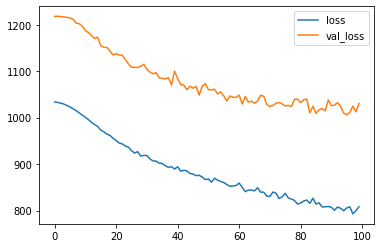

In [16]:
epochs = 100
history = model.fit(
    X_train, y_train,
    validation_split=0.1,
    batch_size=128,
    epochs=epochs,
    callbacks=[early_stopping],
    verbose=1,
)

history_df = pd.DataFrame(history.history)
history_df.loc[0:, ['loss', 'val_loss']].plot()
print(("Minimum Validation Loss: {:0.4f}").format(history_df['val_loss'].min()))